In [1]:
import os
import json
import pandas as pd
from src.gender import gender
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())
with open(os.path.join("data_fixes", "zeny.json"), encoding="utf-8") as zeny:
    zeny = json.loads(zeny.read())
with open(os.path.join("data_fixes", "nelide.json"), encoding="utf-8") as nelide:
    nelide = json.loads(nelide.read())

In [2]:
hcf = df[df["Délka"] == "dlouhometrážní"].explode("Typologie")
hcf = hcf[hcf["Typologie"] == "hraný"]

In [3]:
dve_pohlavi = ["muž","žena"]

## Herectvo

In [4]:
hcf = hcf[["Film","Copyright","Režie","Scénář","Původní filmový námět","Hrají","Typologie"]]

In [5]:
def hlrole(x):
    try:
        x = x[0]
    except:
        x = x
    return x

In [6]:
hcf["Hlavní role"] = hcf["Hrají"].apply(lambda x: hlrole(x))

In [7]:
hcf["Gender hlavní role"] = hcf["Hlavní role"].apply(lambda x: gender(x, zeny, nelide))

In [8]:
hcf[["Film","Hlavní role","Gender hlavní role"]].sample(5)

,Film,Hlavní role,Gender hlavní role
3202,Indiánské léto (8296),Tatiana Vilhelmová (935),žena
1547,Hvězda jede na jih (396329),Gordana Miletić,muž
1970,7 zabitých (396646),Stanislava Bartošová (27158),žena
2995,Stupně poražených (397594),Bohumil Starnovský (126507),muž
1231,Zelená knížka (396064),Eduard Linkers (21352),muž


In [9]:
pomer_hl_roli = pd.Series(hcf[hcf["Gender hlavní role"] == "žena"].groupby("Copyright")["Hlavní role"].nunique() / hcf[(hcf["Gender hlavní role"] == "muž") | (hcf["Gender hlavní role"] == "žena")].groupby("Copyright")["Hlavní role"].nunique())

<AxesSubplot:xlabel='Copyright'>

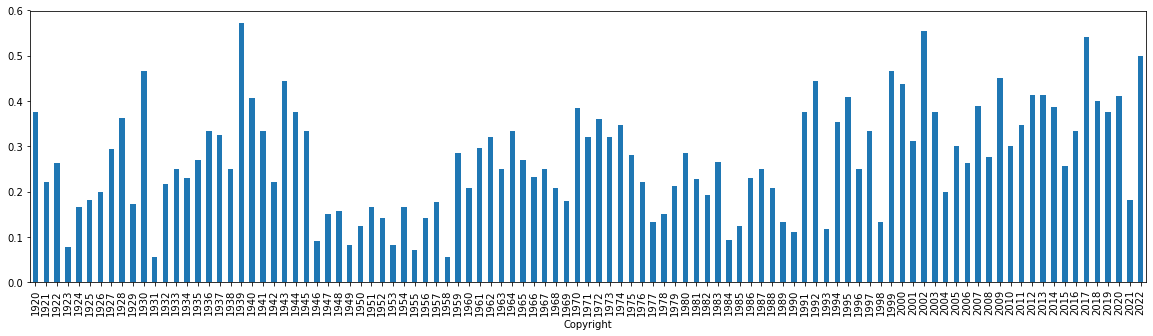

In [10]:
pomer_hl_roli.plot.bar(figsize=(20,5))

In [11]:
hcf = hcf.explode("Hrají")[["Film","Copyright","Režie","Hrají"]]

In [12]:
hcf["Gender"] = hcf["Hrají"].apply(lambda x: gender(x, zeny, nelide))

In [13]:
hcf[hcf["Gender"] == "žena"].groupby(["Copyright","Film"])["Hrají"].nunique().groupby("Copyright").sum()

Copyright
1920     36
1921     29
1922     60
1923     33
1924     34
       ... 
2018    696
2019    756
2020    422
2021    387
2022     37
Name: Hrají, Length: 103, dtype: int64

In [14]:
pomer_herecek = pd.Series(hcf[hcf["Gender"] == "žena"].groupby("Copyright")["Hrají"].nunique() / hcf[(hcf["Gender"] == "muž") | (hcf["Gender"] == "žena")].groupby("Copyright")["Hrají"].nunique())

In [15]:
pomer_herecek

Copyright
1920    0.287129
1921    0.274725
1922    0.294479
1923    0.215517
1924    0.218391
          ...   
2018    0.336302
2019    0.378392
2020    0.392788
2021    0.372756
2022    0.333333
Name: Hrají, Length: 103, dtype: float64

<AxesSubplot:xlabel='Copyright'>

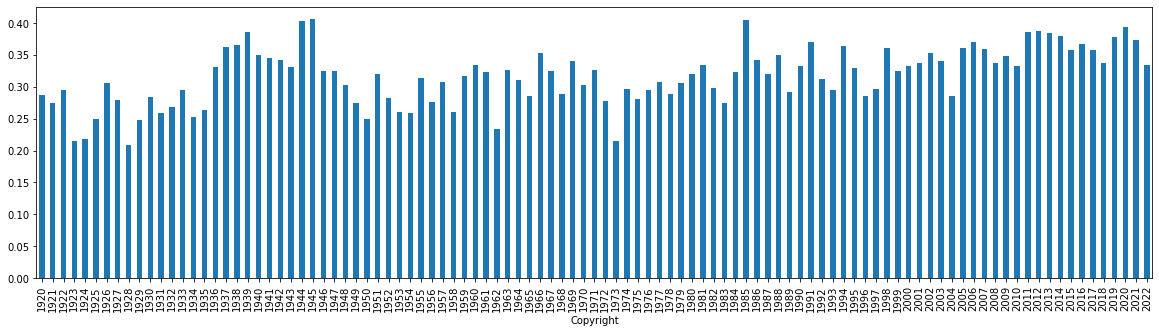

In [16]:
pomer_herecek.plot.bar(figsize=(20,5))

In [17]:
pomer_herecek = pd.Series(hcf[hcf["Gender"] == "žena"].groupby(["Copyright","Film"])["Hrají"].nunique().groupby("Copyright").sum() / hcf[(hcf["Gender"] == "muž") | (hcf["Gender"] == "žena")].groupby(["Copyright","Film"])["Hrají"].nunique().groupby("Copyright").sum(), name="Podíl hereček")

In [18]:
pomer_herecek

Copyright
1920    0.281250
1921    0.228346
1922    0.229008
1923    0.220000
1924    0.253731
          ...   
2018    0.338521
2019    0.370225
2020    0.385036
2021    0.379412
2022    0.333333
Name: Podíl hereček, Length: 103, dtype: float64

<AxesSubplot:xlabel='Copyright'>

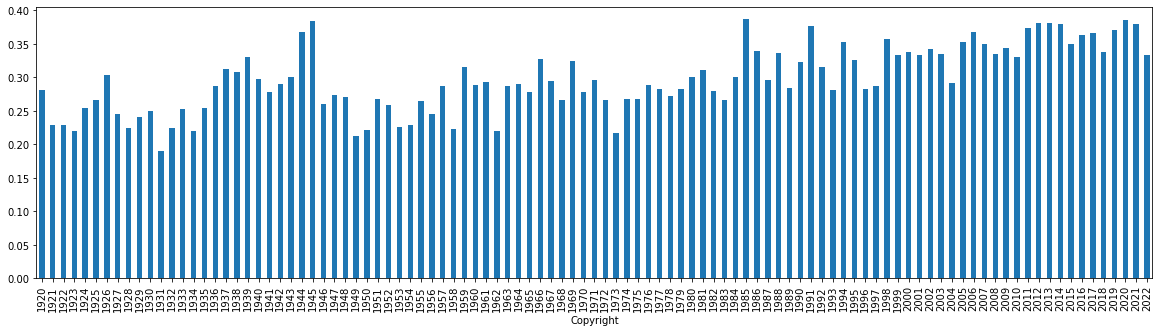

In [19]:
pomer_herecek.plot.bar(figsize=(20,5))

In [20]:
hcf[hcf["Gender"] == "žena"].groupby("Film")["Hrají"].nunique().sum() / hcf.groupby("Film")["Hrají"].nunique().sum()

0.3036772341335288

In [21]:
hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 1983) & (hcf["Copyright"] <= 2002)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum()

0.23718747404269458

In [22]:
hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 2003)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum()

0.3577539662762688

In [23]:
(hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 2003)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum() - hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 1983) & (hcf["Copyright"] <= 2002)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum()) / 20

0.006028324611678712

In [24]:
2023 + (0.5 - hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 2003)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum()) / ((hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 2003)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum() - hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 1983) & (hcf["Copyright"] <= 2002)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum()) / 20)

2046.5962797106442

In [25]:
hcf[hcf["Gender"] == "muž"].groupby("Film")["Hrají"].nunique().nlargest()

Film
Temné slunce (397277)                302
Dny zrady (396979)                   267
Osvobození Prahy (397108)            215
Putování Jana Amose (397429)         213
Lásky mezi kapkami deště (397232)    157
Name: Hrají, dtype: int64

In [26]:
hcf["Hrají"].nunique()

36044

In [27]:
hcf[hcf["Gender"] == "muž"]["Hrají"].nunique()

23773

In [28]:
hcf[hcf["Gender"] == "žena"]["Hrají"].nunique()

12271

## Herectvo

In [29]:
herectvo = pd.read_json(os.path.join("data", "herectvo.json"))

In [30]:
herectvo

,Jméno,Bio,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Titul,Film,Rok,Úloha,Role,Alternativní jména,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Věk
0,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Vratné lahve,Vratné lahve (23639),2007,Hrají,důchodce v parku,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,55.0
1,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Nejistá sezóna,Nejistá sezóna (397550),1987,Hrají,kulisák Honza Melichar,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,35.0
2,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Vesničko má středisková,Vesničko má středisková (397480),1985,Hrají,bagrista Ferda,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,33.0
3,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Rozpuštěný a vypuštěný,Rozpuštěný a vypuštěný (397438),1984,Hrají,agent Ziegler,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,32.0
4,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika","Jára Cimrman, ležící, spící","Jára Cimrman, ležící, spící (397423)",1983,Hrají,krajánek,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86646,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Straka v hrsti,Straka v hrsti (397595),1987,Hrají,čeledín,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,39.0
86647,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Rekord,Rekord (397357),1982,Hrají,chlapec,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,34.0
86648,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Opera ve vinici,Opera ve vinici (397330),1981,Hrají,přítel Jiří,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,33.0
86649,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Kalamita,Kalamita (397340),1980,Hrají,milenec,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,32.0


In [31]:
herectvo = herectvo.explode("Role")

In [32]:
herectvo[herectvo["Role"].str.lower().str.contains("princ",na=True)][["Jméno","Rok","Film","Role","Věk"]].sort_values(by="Věk",ascending=False).head(50)

,Jméno,Rok,Film,Role,Věk
62289,Ladislav Pešek (53326),1975,Prodaná nevěsta (397091),principál komediantů,69.0
48165,Marie Häusslerová (33648),1933,Pobočník Jeho Výsosti (395614),starší komorná princezny,67.0
48164,Marie Häusslerová (33648),1933,Pobočník Jeho Výsosti [německá verze] (395590),starší komorná princezny,67.0
58141,Martin Růžek (4934),1984,Komediant (397445),principál Fortunatus,66.0
52332,Theodor Pištěk (37366),1959,Princezna se zlatou hvězdou (396365),princův pobočník,64.0
80400,Harriet Walter (84392),2012,Královská aféra (182846),"Augusta, princezna z Walesu",62.0
26242,Antonín Bulík (130255),1938,Co se šeptá (395844),princ Lobkovic,60.0
41869,Ludmila Vostrčilová (27337),1978,Mladý muž a bílá velryba (397200),sekretářka Šprinclová,60.0
41841,Ludmila Vostrčilová (27337),1978,Mladý muž a bílá velryba (397200),sekretářka Šprinclová,60.0
47711,Radovan Lukavský (3301),1976,Malá mořská víla (397113),"král všech moří, otec šesti princezen",57.0


In [33]:
zanry = df[["Film","Žánr"]]

In [34]:
zanry

,Film,Žánr
0,Polední výstřel na Mariánských hradbách (401709),reportáž
1,Cvičení s kužely Sokolů malostranských (401704),"[reportáž, sportovní]"
2,Cyklisté (401705),reportáž
3,Defilování vojska o Božím těle na Královských ...,reportáž
4,Hanácké banderium (401707),reportáž
...,...,...
4503,Mimořádná událost (402176),"[komedie, satira, bláznivá komedie]"
4504,Po čem muži touží 2 (402173),"[fantastický, komedie]"
4505,Až zařve lev (402204),"[historický, životopisný, esej]"
4506,Planeta Praha (402218),"[přírodopisný, rodinný]"


In [35]:
zanry.explode("Žánr").groupby("Žánr")["Film"].nunique().nlargest(50)

Žánr
komedie              978
drama                643
psychologický        410
příběh               229
povídka              228
reklamní             224
pohádka              216
dětský               188
historický           176
melodrama            164
dokument             133
kriminální           121
hudební              112
životopisný          112
etuda                110
satira                94
dobrodružný           90
hořká komedie         78
groteska              77
povídkový             76
politický             75
osvětový              71
reportáž              69
rodinný               69
sociální              68
detektivní            66
tragikomedie          61
umělecký              58
válečný               51
fantastický           47
thriller              47
medailon              43
sci-fi                43
smutná komedie        43
podobenství           42
poetický              42
road movie            42
časosběrný            42
esej                  40
propagační          

In [36]:
pohadky = ["pohádka","dětský","rodinný"]

In [37]:
herectvo = herectvo.merge(zanry, on="Film")

In [38]:
herectvo = herectvo.explode("Žánr")

In [39]:
herectvo[(herectvo["Role"].str.lower().str.contains("důchodce",na=True,regex=True))].groupby(["Jméno","Film","Role"])["Věk"].max().nsmallest(20)

Jméno                        Film                                 Role                                           
Lubomír Kostelka (841)       Přehlídce velím já! (396823)         invalidní důchodce Josef Rendl                     42.0
Josef Vinklář (4983)         Jakou barvu má láska (396997)        hlas důchodce Máchy                                43.0
Luděk Pilc (128781)          Nikdo se nebude smát (396650)        elegantní důchodce                                 43.0
Josef Somr (1054)            Evžen mezi námi (397316)             důchodce Koutný                                    47.0
Martin Finger (19835)        Zahradnictví: Nápadník (401672)      invalidní důchodce Jindřich Rohn, Vilmin manžel    47.0
Ondřej Malý (59148)          Učitelka (400766)                    invalidní důchodce Řehák                           50.0
Josef Koza (126437)          Zlá noc (396978)                     důchodce Kverka, výpomocný zámečník                52.0
Josef Burda (78901)          Jak

In [40]:
herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().nlargest(20)

Jméno                      Film                                 Role                              
Jiří Maryško (81150)       Tajemství staré bambitky 2 (402174)  princ Oleandr, nápadník               41.0
Petr Hanuš (3548)          Třetí princ (397364)                 princ na koni                         39.0
Vladimír Zoubek (125641)   O medvědu Ondřejovi (396371)         princ Vítek                           39.0
Miroslav Kalný (131466)    O medvědu Ondřejovi (396371)         princ nápadník                        37.0
Soběslav Sejk (9018)       O medvědu Ondřejovi (396371)         princ Hynek                           37.0
Miroslav Horníček (13266)  Byl jednou jeden král... (396193)    princ krásný, syn Alabastra XVI.      36.0
Václav Neužil (9101)       Sedmero krkavců (400594)             princ Norbert                         36.0
Jiří Bartoška (827)        Třetí princ (397364)                 princ Jindřich                        35.0
Ondřej Vetchý (836)        Kouzelný měšec (85

In [41]:
herectvo[(herectvo["Film"] == "Tajemství staré bambitky 2 (402174)")]

,Jméno,Bio,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Titul,Film,Rok,Úloha,Role,Alternativní jména,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Věk,Žánr
1005,Petr Koutecký (10038),None,1954,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Mluví,hlas kočího,None,None,None,None,None,1954.0,NaN,67.0,pohádka
1006,Otmar Brancuzský (1063),None,13.02.1956,"Jihlava, Československo",22.10.2022,"Malý Beranov u Jihlavy, Česká republika",Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,generál,None,Jihlava,Československo,Česká republika,Česká republika,1956.0,2022.0,65.0,pohádka
1007,Martin Hanuš (1080),None,14.11.1964,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,jezdec na koni/kočí/dubl,None,None,None,None,None,1964.0,NaN,57.0,pohádka
1008,Leoš Noha (16926),None,04.05.1968,"Ústí nad Labem, Československo",None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,sedlák Macháně,None,Ústí nad Labem,Československo,None,None,1968.0,NaN,53.0,pohádka
1009,Jan Šobor (17695),None,None,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,vesničan,None,None,None,None,None,NaN,NaN,NaN,pohádka
1010,Lucie Kožinová (17999),None,1969,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,Marie Švecová,None,None,None,None,None,1969.0,NaN,52.0,pohádka
1011,Dita Zábranská (22673),None,None,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,hostinská,None,None,None,None,None,NaN,NaN,NaN,pohádka
1012,Veronika Kubařová (26753),None,01.06.1987,"Rakovník, Československo",None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,"[Zpívá, Hrají]",královna Julie I.,"Veronika Khek (provdaná), Veronika Khek Kubařová",Rakovník,Československo,None,None,1987.0,NaN,34.0,pohádka
1013,Veronika Kubařová (26753),None,01.06.1987,"Rakovník, Československo",None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,"[Zpívá, Hrají]",královna Julie I.,"Veronika Khek (provdaná), Veronika Khek Kubařová",Rakovník,Československo,None,None,1987.0,NaN,34.0,pohádka
1014,Matěj Merunka (35802),None,None,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,lesní adjunkt,None,None,None,None,None,NaN,NaN,NaN,pohádka


In [42]:
herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().median()

29.0

In [43]:
herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().mean()

28.65

In [44]:
herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().nlargest(20)

Jméno                      Film                                    Role                                
Jitka Ježková (5336)       O princezně, která se nesmála (179679)  princezna                               33.0
Stella Májová (67287)      Byl jednou jeden král... (396193)       princezna Zpěvanka                      31.0
Jorga Kotrbová (125595)    Honza málem králem (397135)             princezna                               30.0
Květa Fialová (5338)       Princezna se zlatou hvězdou (396365)    princezna Florindella                   30.0
Irena Kačírková (81377)    Byl jednou jeden král... (396193)       princezna Drahomíra                     29.0
Libuše Šafránková (2272)   Třetí princ (397364)                    princezna Milena/princezna ze skal      29.0
Sabina Laurinová (3857)    Z pekla štěstí 2 (1201)                 princezna Eufrozína                     29.0
Vlasta Fialová (5062)      Legenda o lásce (396257)                princezna Mechmene Banu                 28.0


In [45]:
herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().median()

22.5

In [46]:
herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().mean()

22.65

In [47]:
herectvo.groupby("Jméno")["Věk"].max().nlargest()

Jméno
Jaroslav Hilbert (63466)      108.0
František Kovářík (126912)    104.0
Zdeněk Procházka (127279)     100.0
Zita Kabátová (839)            96.0
Miroslav Mráz (125568)         95.0
Name: Věk, dtype: float64

In [48]:
herectvo["Gender"] = herectvo["Jméno"].apply(lambda x: gender(x, zeny, nelide))

In [49]:
vyplneno = pd.Series(herectvo.groupby("Jméno")["Rok narození"].first(), name="vyplneno")
print(vyplneno[~vyplneno.isnull()].index.nunique())
print((vyplneno[vyplneno.isnull()].index.nunique()))

6336
5779


In [50]:
distribuce = pd.DataFrame(herectvo.groupby(["Film","Rok","Jméno","Věk","Gender"])["Rok úmrtí"].first().reset_index())

In [51]:
distribuce[distribuce["Rok úmrtí"].isnull()]

,Film,Rok,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
5,"...A bílá bledla, až celkem ztmavla (397394)",1983,Martin Kubala (714),25.0,muž,NaN
...,...,...,...,...,...,...
65755,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Karel Vítek (126651),34.0,muž,NaN
65756,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Kateřina Frýbová (88894),21.0,žena,NaN
65757,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Ladislav Mrnka (126577),47.0,muž,NaN
65764,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Nora Krčmářová (128785),45.0,žena,NaN


In [52]:
distribuce

,Film,Rok,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
2,"...A bílá bledla, až celkem ztmavla (397394)",1983,Karel Hovorka (76534),59.0,muž,1988.0
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
...,...,...,...,...,...,...
65773,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Vlastimil Hašek (35693),42.0,muž,1992.0
65774,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Blažek (126904),48.0,muž,1984.0
65775,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Kryzánek (81388),50.0,muž,1975.0
65776,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Srstka (7960),35.0,muž,2019.0


In [53]:
distribuce = distribuce[(distribuce["Rok úmrtí"] >= (distribuce["Rok"] + 2)) | (distribuce["Rok úmrtí"].isnull())]

In [54]:
distribuce

,Film,Rok,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
2,"...A bílá bledla, až celkem ztmavla (397394)",1983,Karel Hovorka (76534),59.0,muž,1988.0
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
...,...,...,...,...,...,...
65773,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Vlastimil Hašek (35693),42.0,muž,1992.0
65774,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Blažek (126904),48.0,muž,1984.0
65775,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Kryzánek (81388),50.0,muž,1975.0
65776,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Srstka (7960),35.0,muž,2019.0


In [55]:
distribuce[distribuce["Film"] == "Vlastníci (402008)"]

,Film,Rok,Jméno,Věk,Gender,Rok úmrtí
55804,Vlastníci (402008),2019,Andrej Polák (10913),40.0,muž,NaN
55805,Vlastníci (402008),2019,Dagmar Havlová (76136),68.0,žena,NaN
55806,Vlastníci (402008),2019,David Novotný (1834),50.0,muž,NaN
55807,Vlastníci (402008),2019,Halka Třešňáková (24197),47.0,žena,NaN
55808,Vlastníci (402008),2019,Jiří Lábus (838),69.0,muž,NaN
55809,Vlastníci (402008),2019,Jiří Černý (13756),37.0,muž,NaN
55810,Vlastníci (402008),2019,Klára Melíšková (13764),48.0,žena,NaN
55811,Vlastníci (402008),2019,Kryštof Hádek (1830),37.0,muž,NaN
55812,Vlastníci (402008),2019,Ladislav Trojan (10040),87.0,muž,2022.0
55813,Vlastníci (402008),2019,Ondřej Malý (59148),53.0,muž,NaN


In [56]:
distribuce.groupby("Film")["Věk"].mean().nlargest(10)

Film
Pomalu, ale slábnu (78814)                      86.500000
Panenství Lídy Baarové (400756)                 83.000000
Rosa & Dara: Co je to gravitace? (400674)       81.000000
Rosa & Dara: Jak velké jsou hvězdy? (400676)    81.000000
Rosa & Dara: Proč prší? (400672)                81.000000
Kouzelná skříň (397535)                         73.000000
Pamětnice (123955)                              72.266667
Pátá loď (401180)                               72.000000
Odborný dohled nad výkladem snu (401766)        71.750000
Až zařve lev (402204)                           70.333333
Name: Věk, dtype: float64

In [57]:
distribuce.groupby("Film")["Věk"].mean().nsmallest(10)

Film
Červená Karkulka (402180)                5.0
Potkal jsem ho v zoo (397759)           11.0
Psí historie (117009)                   11.5
Malý sen (396231)                       13.0
Školní úkol [německá verze] (401193)    13.0
Cesta do pravěku (396218)               14.4
Československý Ježíšek (395161)         15.0
Černý démant (398743)                   15.4
Jak Vašíček přišel k nohám (395247)     17.0
Kino (396465)                           17.0
Name: Věk, dtype: float64

<AxesSubplot:ylabel='Frequency'>

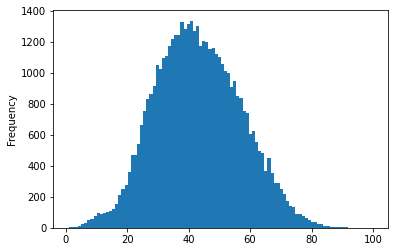

In [58]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].plot.hist(bins=98)

<AxesSubplot:ylabel='Frequency'>

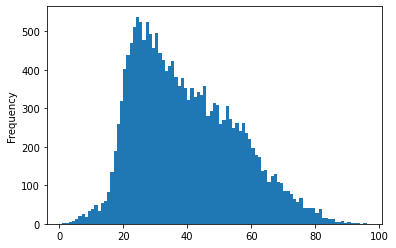

In [59]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].plot.hist(bins=95)

In [60]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].median()

43.0

In [61]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].median()

36.0

In [62]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].mode()

0    41.0
Name: Věk, dtype: float64

In [63]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].mode()

0    24.0
Name: Věk, dtype: float64

In [64]:
distribuce[(distribuce["Rok"] >= 2003) & (distribuce["Gender"] == "muž")]["Věk"].median()

46.0

In [65]:
distribuce[(distribuce["Rok"] >= 2003) & (distribuce["Gender"] == "žena")]["Věk"].median()

41.0

<AxesSubplot:ylabel='Frequency'>

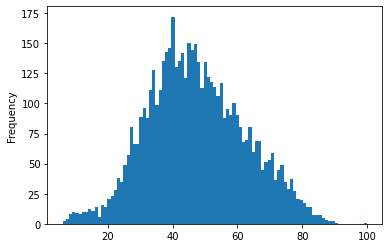

In [66]:
distribuce[(distribuce["Rok"] >= 2003) & (distribuce["Gender"] == "muž")]["Věk"].plot.hist(bins=95)

<AxesSubplot:ylabel='Frequency'>

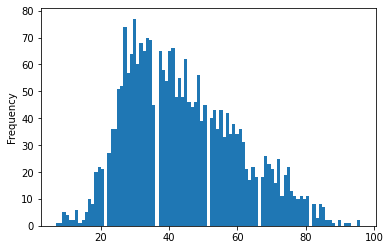

In [67]:
distribuce[(distribuce["Rok"] >= 2003) & (distribuce["Gender"] == "žena")]["Věk"].plot.hist(bins=95)

## Režisérstvo

In [68]:
reziserstvo = df[["Copyright","Typologie","Délka","Žánr","Film","Režie"]]

In [69]:
reziserstvo = reziserstvo.explode("Režie").explode("Typologie").explode("Délka")

In [70]:
reziserstvo["Gender"] = reziserstvo["Režie"].apply(lambda x: gender (x, zeny, nelide))

In [71]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Copyright"] >= 2003)]

,Copyright,Typologie,Délka,Žánr,Film,Režie,Gender
3460,2003,dokumentární,dlouhometrážní,dokument,Ničeho nelituji (26300),Theodora Remundová (5425),žena
3460,2003,distribuční,dlouhometrážní,dokument,Ničeho nelituji (26300),Theodora Remundová (5425),žena
3461,2003,hraný,dlouhometrážní,psychologický,Nevěrné hry (20323),Michaela Pavlátová (6866),žena
3461,2003,distribuční,dlouhometrážní,psychologický,Nevěrné hry (20323),Michaela Pavlátová (6866),žena
3465,2003,animovaný,krátkometrážní,komedie,Čapí film (25375),Denisa Grimmová (9607),žena
...,...,...,...,...,...,...,...
4491,2021,distribuční,dlouhometrážní,"[dobrodružný, rodinný]",Myši patří do nebe (402168),Alice Hurychová (81624),žena
4499,2021,hraný,dlouhometrážní,"[komedie, parodie, bláznivá komedie]",Mstitel (402140),Lucia Gažiová (19838),žena
4499,2021,distribuční,dlouhometrážní,"[komedie, parodie, bláznivá komedie]",Mstitel (402140),Lucia Gažiová (19838),žena
4507,2022,dokumentární,dlouhometrážní,medailon,Identita ES (402166),Alena Činčerová (5732),žena


In [72]:
reziserstvo[(reziserstvo["Gender"] == "žena")]["Film"].nunique() / reziserstvo["Film"].nunique()

0.09960070984915706

In [73]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný")]["Film"].nunique() / reziserstvo[(reziserstvo["Typologie"] == "hraný")]["Film"].nunique()

0.05519388621568073

In [74]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Copyright"] >= 2003)]["Film"].nunique() / reziserstvo[(reziserstvo["Copyright"] >= 2003)]["Film"].nunique()

0.2295390404515522

In [75]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný") & (reziserstvo["Copyright"] >= 2003)]["Film"].nunique() / reziserstvo[(reziserstvo["Copyright"] >= 2003) & (reziserstvo["Typologie"] == "hraný")]["Film"].nunique()

0.1445993031358885

<AxesSubplot:xlabel='Copyright'>

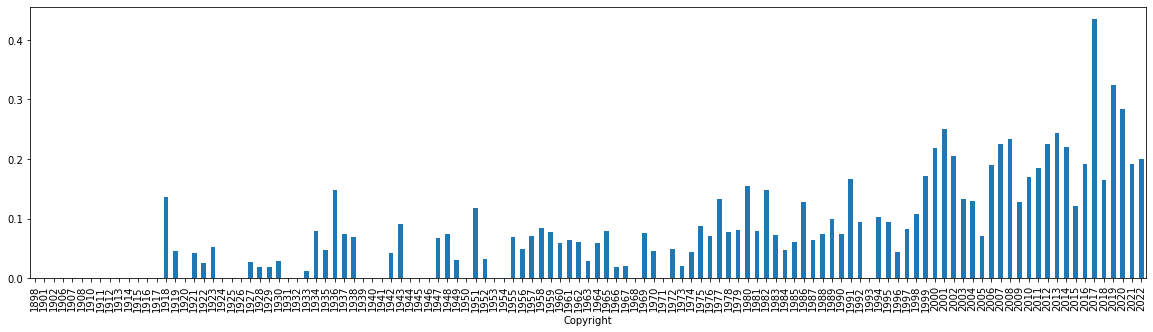

In [76]:
pomer_reziserek = pd.Series(reziserstvo[reziserstvo["Gender"] == "žena"].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo.groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

<AxesSubplot:xlabel='Copyright'>

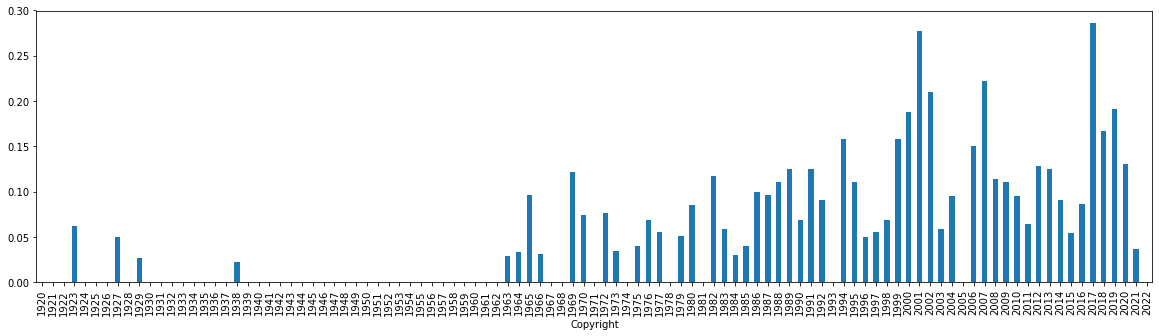

In [77]:
pomer_reziserek = pd.Series(reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo[(reziserstvo["Typologie"] == "hraný") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

In [78]:
reziserstvo[reziserstvo["Gender"] == "žena"].groupby("Režie")[["Copyright","Film","Typologie"]].min().sort_values(by="Copyright")

,Copyright,Film,Typologie
Režie,,,
Hedvika Raabeová (124236),1918,Praha roku 1549 (395171),distribuční
Olga Rautenkranzová (80115),1918,Kozlonoh (395165),distribuční
Thea Červenková (73006),1919,Babička (395236),distribuční
Květoslava Semonická (128168),1927,Ve spárech upíra (395423),distribuční
Hermína Týrlová (4754),1928,Co jim schází? (398629),animovaný
...,...,...,...
Martina Netíková,2020,FAMU v kině 01 (402101),animovaný
Mária Pinčíková (122068),2021,Na značky! (402115),distribuční
Adéla Špaljová (3107),2021,Nebe (402085),distribuční


In [79]:
typy = reziserstvo["Typologie"].drop_duplicates().to_list()

In [80]:
for t in typy:
    try:
        mu = reziserstvo[(reziserstvo["Copyright"] >= 2003) & (reziserstvo["Typologie"] == t)].groupby("Gender")["Film"].nunique().iloc[0]
        ze = reziserstvo[(reziserstvo["Copyright"] >= 2003) & (reziserstvo["Typologie"] == t)].groupby("Gender")["Film"].nunique().iloc[1]
        print(f"""{t}: {ze/(ze+mu)}, m: {mu}, ž: {ze}""")
    except:
        print(f"""{t}: m: {mu}, ž: {ze}""")

dokumentární: 0.3159340659340659, m: 249, ž: 115
distribuční: 0.22761194029850745, m: 828, ž: 244
hraný: 0.14335060449050085, m: 496, ž: 83
animovaný: 0.3582089552238806, m: 86, ž: 48
studentský: 0.4909090909090909, m: 56, ž: 54
nedistribuční: m: 2, ž: 54
středometrážní: m: 2, ž: 54
krátkometrážní: 0.3, m: 7, ž: 3


<AxesSubplot:xlabel='Copyright'>

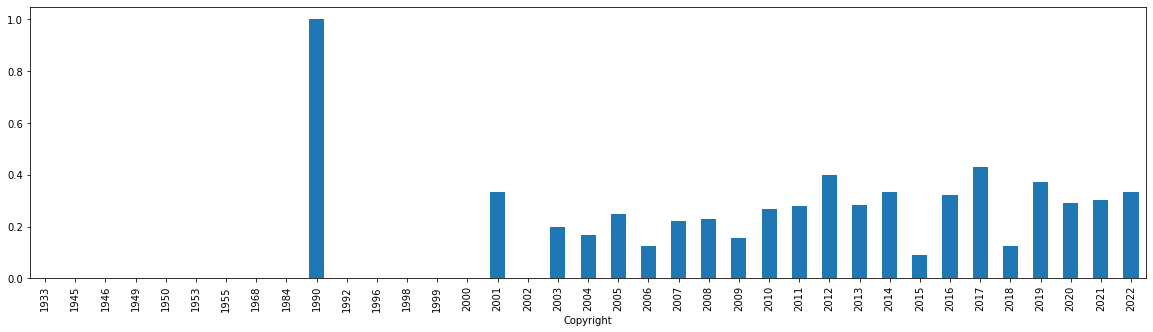

In [81]:
pomer_reziserek = pd.Series(reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo[(reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

## Různé profese

In [82]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [83]:
df["Asistent vedoucího produkce"].drop_duplicates().to_list()

[None,
 '130400,',
 '8710, Zuzana Křížová, Irena Fryčová, Svatava Bumanová',
 '8710, 8936, 7698, Irena Fryčová, Petr Čermák',
 '8710, 711, Svatava Bumanová',
 '130420, 6109, Filip Smola',
 ', Zdeňka Králíková',
 '8710, 10808, 711, Pavla Boučková, Svatava Bumanová',
 '57574, 89045, Michaela Antošíková',
 '6650,',
 '128097, Ivana Jenčová',
 ', Filip Smola',
 '32781, 36954, Petra Makarjevová, Petr Jahn',
 ', Alžběta Jindrová',
 '1224, 62406, Monika Machytková',
 '2267,',
 ', Andrea Jarmarová',
 '22220,',
 '65346,',
 '32919,',
 '36328, 54668, 54648, 80516, 66238,',
 '62804, Lenka Marušanová',
 '82274, Pavel Filip',
 ', Marek Čáp, Veronika Kalafusová, Lucie Nováková, Zuzana Mohrová',
 ', Šárka Josefína Slouková',
 '7139, 46614, Waly V. Kolman',
 '46614, 88887, Waly V. Kolman',
 ', Ladislav Linhart ml.',
 '79894, 75608, Ľudmila Fiťková',
 '46614, Waly V. Kolman',
 '46614, Terezie Křížkovská, Waly V. Kolman',
 ', Tatiana Novotná',
 '66827, 80516, 88066,',
 '87516, 46614, Alžběta Baráková',
 '

In [84]:
profesni_pomery = {}
for p in seznamy["profese"]:
    df_pracovni = df[["Film","Copyright",p]].explode(p)
    df_pracovni = df_pracovni.merge(persony[["Jméno","Osoba"]], left_on = p, right_on = "Jméno")
    df_pracovni = df_pracovni[df_pracovni["Osoba"] == "fyzická"]
    df_pracovni["Gender profese"] = df_pracovni[p].apply(lambda x: gender(x, zeny, nelide))
    profesni_pomery[p] = [df_pracovni.groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "muž"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum() / df_pracovni[df_pracovni["Gender profese"].isin(dve_pohlavi)].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "muž"]["Copyright"].min(), df_pracovni[df_pracovni["Gender profese"] == "žena"]["Copyright"].min()]
profesni_pomery = pd.DataFrame.from_dict(profesni_pomery).transpose().rename(columns={0: "Celkem", 1: "Mužů", 2: "Žen", 3: "Podíl žen", 4: "První muž", 5: "První žena"})
profesni_pomery.sort_values(by="Podíl žen",ascending=False)

C:\Users\micha\AppData\Local\Temp\ipykernel_18592\642391709.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  profesni_pomery[p] = [df_pracovni.groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "muž"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum() / df_pracovni[df_pracovni["Gender profese"].isin(dve_pohlavi)].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "muž"]["Copyright"].min(), df_pracovni[df_pracovni["Gender profese"] == "žena"]["Copyright"].min()]
C:\Users\micha\AppData\Local\Temp\ipykernel_18592\642391709.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  profesni_pomery[p] = [df_pracovni.groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "muž"].groupby("Film")[p].nunique().sum(), df_

,Celkem,Mužů,Žen,Podíl žen,První muž,První žena
Zástupce vedoucího produkce,192.0,40.0,152.0,0.791667,1991.0,1991.0
Návrhy kostýmů,1873.0,709.0,1164.0,0.621463,1922.0,1932.0
Produkce,664.0,375.0,289.0,0.435241,1935.0,1954.0
Masky,4521.0,2673.0,1848.0,0.408759,1926.0,1945.0
Vedoucí produkce,715.0,433.0,282.0,0.394406,1991.0,1993.0
Zpívá,387.0,245.0,142.0,0.366925,1934.0,1934.0
Zástupce vedoucího výroby,1671.0,1104.0,567.0,0.339318,1931.0,1949.0
Výkonná produkce,925.0,619.0,306.0,0.330811,1991.0,1996.0
Spolupráce,7197.0,5033.0,2164.0,0.300681,1902.0,1925.0
Hrají,76811.0,54543.0,22268.0,0.289906,1898.0,1898.0


In [85]:
profesni_pomery20 = {}
for p in seznamy["profese"]:
    df_pracovni = df[df["Copyright"] >= 2003][["Film",p]].explode(p)
    df_pracovni = df_pracovni.merge(persony[["Jméno","Osoba"]], left_on = p, right_on = "Jméno")
    df_pracovni = df_pracovni[df_pracovni["Osoba"] == "fyzická"]
    df_pracovni["Gender profese"] = df_pracovni[p].apply(lambda x: gender(x, zeny, nelide))
    profesni_pomery20[p] = [df_pracovni.groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "muž"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum() / df_pracovni[df_pracovni["Gender profese"].isin(dve_pohlavi)].groupby("Film")[p].nunique().sum()]

profesni_pomery20 = pd.DataFrame.from_dict(profesni_pomery20).transpose().rename(columns={0: "Celkem", 1: "Mužů", 2: "Žen", 3: "Podíl žen"})
profesni_pomery20.sort_values(by="Podíl žen",ascending=False)

C:\Users\micha\AppData\Local\Temp\ipykernel_18592\3185291228.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  profesni_pomery20[p] = [df_pracovni.groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "muž"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum() / df_pracovni[df_pracovni["Gender profese"].isin(dve_pohlavi)].groupby("Film")[p].nunique().sum()]
C:\Users\micha\AppData\Local\Temp\ipykernel_18592\3185291228.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  profesni_pomery20[p] = [df_pracovni.groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "muž"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].

,Celkem,Mužů,Žen,Podíl žen
Zástupce vedoucího produkce,147.0,18.0,129.0,0.877551
Návrhy kostýmů,471.0,101.0,370.0,0.785563
Masky,683.0,223.0,460.0,0.673499
Zástupce vedoucího výroby,100.0,37.0,63.0,0.630000
Produkce,541.0,279.0,262.0,0.484288
Choreografie,71.0,41.0,30.0,0.422535
Vedoucí výroby,332.0,197.0,135.0,0.406627
Vedoucí produkce,664.0,397.0,267.0,0.402108
Hrají,15858.0,10397.0,5461.0,0.344369
Výkonná produkce,841.0,554.0,287.0,0.341260


In [86]:
df_pracovni = df[df["Copyright"] >= 2003][["Film","Kostýmy"]].explode("Kostýmy")
df_pracovni = df_pracovni.merge(persony[["Jméno","Osoba"]], left_on = "Kostýmy", right_on = "Jméno")
df_pracovni = df_pracovni[df_pracovni["Osoba"] == "fyzická"]
len(df_pracovni["Kostýmy"].to_list())
len(df_pracovni["Kostýmy"].drop_duplicates().to_list())

0

In [87]:
df_pracovni = df[df["Copyright"] >= 2003][["Film","Skript"]].explode("Skript")
df_pracovni = df_pracovni.merge(persony[["Jméno","Osoba"]], left_on = "Skript", right_on = "Jméno")
df_pracovni = df_pracovni[df_pracovni["Osoba"] == "fyzická"]
len(df_pracovni["Skript"].drop_duplicates().to_list())

0

## Věk

(Moc to nevypovídá, u řady profesí je málo dat.)

In [88]:
vek20 = {}
for p in seznamy["profese"]:
    df_pracovni = df.explode("Typologie")
    df_pracovni = df_pracovni[(df_pracovni["Typologie"] == "hraný") & (df_pracovni["Délka"] == "dlouhometrážní")]
    df_pracovni = df_pracovni[df_pracovni["Copyright"] >= 2003][["Film","Copyright",p]].explode(p)
    df_pracovni = df_pracovni.merge(persony, left_on = p, right_on = "Jméno")
    df_pracovni = df_pracovni[df_pracovni["Osoba"] == "fyzická"]
    df_pracovni["Věk"] = df_pracovni["Copyright"] - df_pracovni["Rok narození"]
    df_pracovni = df_pracovni[~(df_pracovni["Rok úmrtí"] < df_pracovni["Copyright"])]
    vek20[p] = [df_pracovni["Věk"].median(), df_pracovni["Věk"].mean(), df_pracovni["Věk"].min(), df_pracovni["Věk"].max(), df_pracovni[p].nunique()]
vek20 = pd.DataFrame.from_dict(vek20).transpose().rename(columns={0: "Průměrný věk", 1: "Medián", 2: "Nejnižší", 3: "Nejvyšší", 4: "n"})
vek20.sort_values(by="Medián",ascending=False)

,Průměrný věk,Medián,Nejnižší,Nejvyšší,n
Dramaturg,58.0,57.181619,22.0,88.0,211.0
Odborný poradce,52.5,56.333333,32.0,91.0,186.0
Pedagogické vedení,51.0,55.819444,33.0,82.0,35.0
Masky,56.0,54.118388,24.0,76.0,193.0
Komentář,54.0,53.956522,28.0,81.0,44.0
Koordinátor kaskadérů,55.0,53.354369,27.0,72.0,47.0
Hudební režie,46.0,50.020000,33.0,73.0,59.0
Účinkují,46.5,49.500000,30.0,69.0,34.0
Výtvarník,46.5,49.314286,27.0,86.0,112.0
Kaskadéři,49.0,49.212707,26.0,73.0,290.0
